# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
beautiful_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
mars_data = beautiful_soup.find_all('tr', class_= 'data-row')
mars_data [:5]

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_weather = []

# Loop through the scraped data to create a list of rows
for row in mars_data:
    for td in row:
        mars_weather.append([td.text for td in row])

In [8]:
# Defining the newline character to be removed
new_line = '\n'

# Iterating through each item in the mars_weather list and remove newline characters if they exist
for each in mars_weather:
    while new_line in each:
        each.remove(new_line)

# Keep only every 10th row from mars_weather, effectively downsampling the data
cleaned_rows = [mars_weather[index] for index in range(0, len(mars_weather), 10)]


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
marstemperature_df = pd.DataFrame(cleaned_rows, columns=column_names)

In [10]:
# Confirm DataFrame was created successfully
marstemperature_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,24,2012-08-18,12,156,6,-76.0,741.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
marstemperature_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
# Ensure id is of type object
marstemperature_df['id'] = marstemperature_df['id'].astype(object)

# Convert terrestrial_date to datetime
marstemperature_df['terrestrial_date'] = pd.to_datetime(marstemperature_df['terrestrial_date'])

# Convert sol, ls, and month to int32
marstemperature_df['sol'] = marstemperature_df['sol'].astype('int32')
marstemperature_df['ls'] = marstemperature_df['ls'].astype('int32')
marstemperature_df['month'] = marstemperature_df['month'].astype('int32')

# Convert min_temp and pressure to float64
marstemperature_df['min_temp'] = marstemperature_df['min_temp'].astype('float64')
marstemperature_df['pressure'] = marstemperature_df['pressure'].astype('float64')

In [13]:
# Confirm type changes were successful by examining data types again
# Checking the data types to ensure they are correct
marstemperature_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_months = marstemperature_df['month'].nunique()

# Displaying the result
print(f"Months on Mars: {mars_months}")

Months on Mars: 12


In [15]:
# 2. How many sols (Martian days) worth of data are there?
# Print the number of Martian days' 
print(f"Martian Days: {len(marstemperature_df)}")

Martian Days: 2801


In [16]:
# 3. What is the average minimum temperature by month?
# Group by month and calculate the mean for 'min_temp'
average_low_temp = marstemperature_df.groupby('month')['min_temp'].mean()

# Loop through each month and print the average low temperature
for month, temp in average_low_temp.items():
    print(f"The average low temperature for month {month} is {round(temp, 2)}°C.")


The average low temperature for month 1 is -77.13°C.
The average low temperature for month 2 is -79.98°C.
The average low temperature for month 3 is -83.3°C.
The average low temperature for month 4 is -82.76°C.
The average low temperature for month 5 is -79.3°C.
The average low temperature for month 6 is -75.27°C.
The average low temperature for month 7 is -72.27°C.
The average low temperature for month 8 is -68.33°C.
The average low temperature for month 9 is -69.11°C.
The average low temperature for month 10 is -72.01°C.
The average low temperature for month 11 is -72.01°C.
The average low temperature for month 12 is -74.5°C.


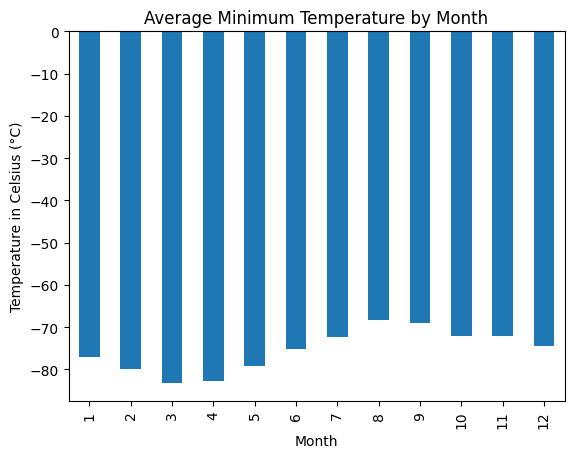

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot the average minimum temperature by month
avg_temp_chart = average_low_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius (°C)')
plt.title('Average Minimum Temperature by Month')
plt.show()
plt.tight_layout()

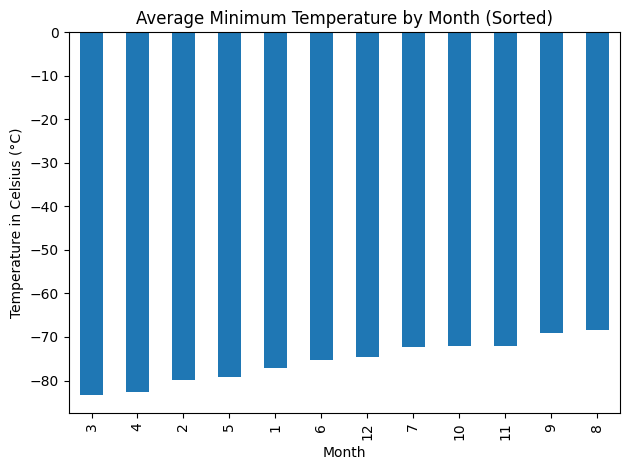

In [30]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
average_low_temp_sorted = average_low_temp.sort_values(ascending=True)

# Plot the sorted temperatures
avg_temp_chart = average_low_temp_sorted.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius (°C)')
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.tight_layout()
plt.show()


In [19]:
# 4. What is the average pressure by month?
average_pressure = marstemperature_df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.444444
2     889.490637
3     877.348432
4     806.390411
5     748.542601
6     745.009050
7     794.976526
8     873.867925
9     913.343284
10    887.291667
11    856.932367
12    842.124498
Name: pressure, dtype: float64

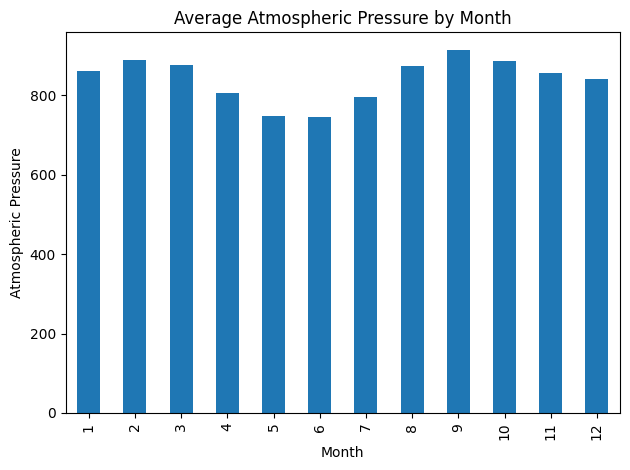

In [24]:
# Plot the average pressure by month
avg_pressure_chart = average_pressure.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')
plt.tight_layout()
plt.show()

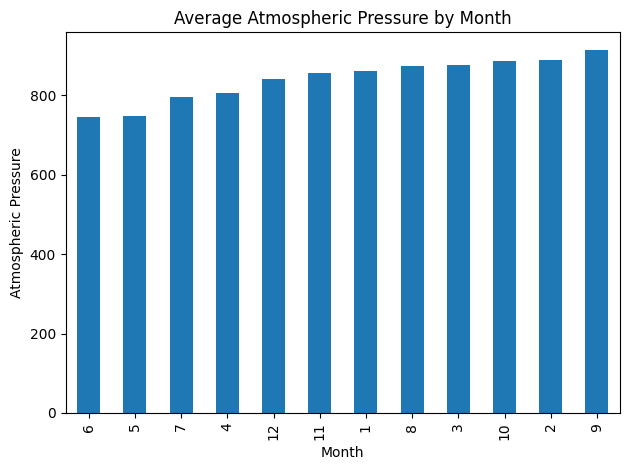

In [25]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the pressures in ascending order
average_pressure_ordered = average_pressure.sort_values(ascending=True)

# Plot the sorted pressures
avg_pressure_chart = average_pressure_ordered.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')
plt.tight_layout()
#
plt.show()

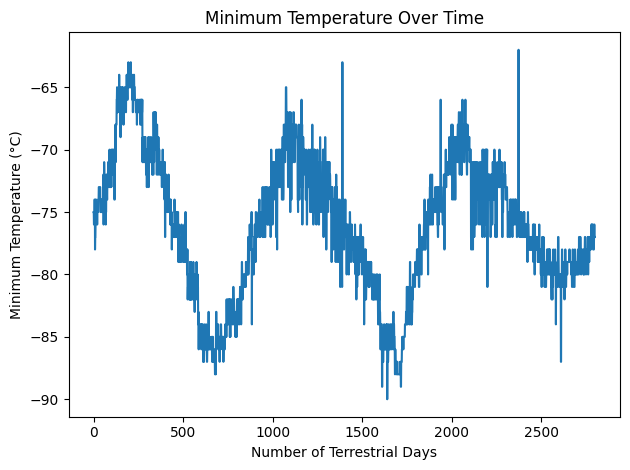

In [27]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
min_temp_chart = marstemperature_df['min_temp'].plot(kind='line')
#Plot the grpah
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature Over Time')
plt.tight_layout()
#Display plot
plt.show()

#### Minimum Temperature

Month 3 has the the coldest minimum temperature on an average followed by month 4, 2 and 5. Month 8 has the least coldest temperature on Mars.

#### Atmospheric Pressure

Atmospheric Pressure on an average is lowest in Month 6 folllowed by Month 5, 7 and 4. Month 9 has the hishest atmospheric pressure on an average in Mars.

#### Year Length
The graph shows a repeating cycle of rising and falling temperatures, which suggests the presence of seasonal variations on Mars. By examining the graph, we can see that one full cycle spans approximately 600–700 Earth days on the x-axis. This roughly corresponds to the length of a Martian year. According to internet one Martian year is around 687 Earth days and the graph shows temperature cycles spanning approximately this length.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
marstemperature_df.to_csv('mars_weather_data.csv', index=False)

In [29]:
browser.quit()